In [3]:
import cv2 as cv
print(cv.__version__)


4.12.0


In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
img = cv.imread("sunflower.jpg")

In [40]:
# blur kernel
kernel_s = np.array([[0.11, 0.11 , 0.11],
                  [0.11, 0.11 , 0.11],
                  [0.11, 0.11, 0.11]] ) 

#sharpening kernel
kernel = np.array([[0, -1 , 0],
                  [-1, 5 , -1],
                  [0, -1, 0]] )

In [8]:
resized_img = cv.resize(img , (300,200))

In [9]:
# result = cv.filter2D(resized_img, -1 , kernel)
# display_img = cv.cvtColor(result , cv.COLOR_BGR2RGB)
# plt.imshow(display_img)

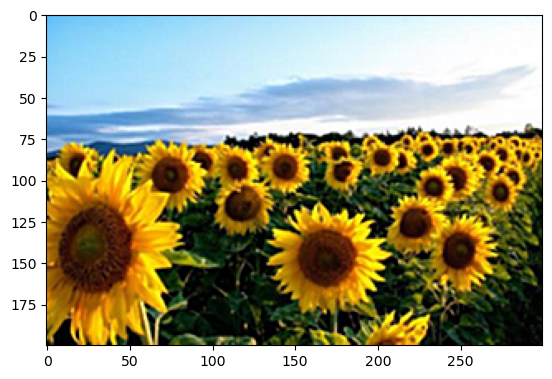

In [13]:
gaussian_filter = cv.GaussianBlur(resized_img , (3,3) , 0)
result = cv.filter2D(gaussian_filter, -1 , kernel)
blur_img = cv.cvtColor(result , cv.COLOR_BGR2RGB)
plt.imshow(blur_img)

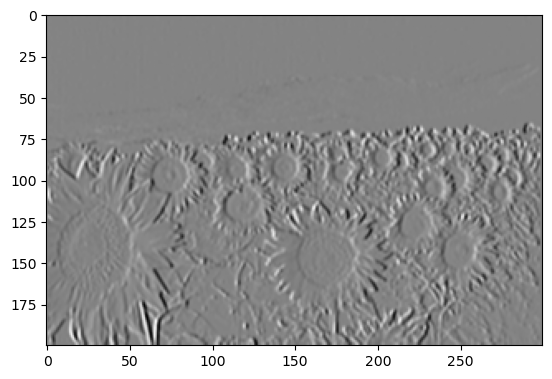

In [76]:
blur_gray = cv.cvtColor(blur_img , cv.COLOR_BGR2GRAY)
sobelx =  cv.Sobel(blur_gray, cv.CV_64F, 1 , 0, ksize=3)
sobely =  cv.Sobel(blur_gray, cv.CV_64F, 0 , 1, ksize=3)
plt.imshow(sobelx , cmap='gray')

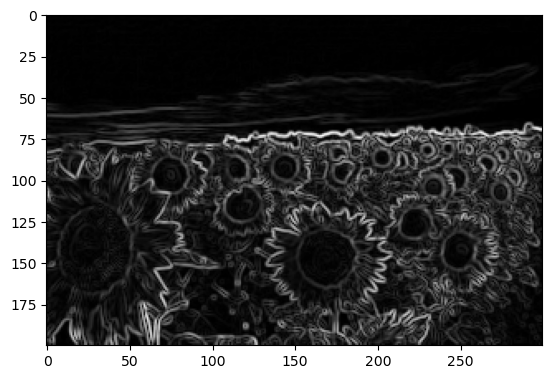

In [66]:
sobel_image = cv.magnitude(sobelx,sobely)
plt.imshow(sobel_image , cmap='gray')

In [44]:
outline = np.uint8(np.absolute(sobel_image))

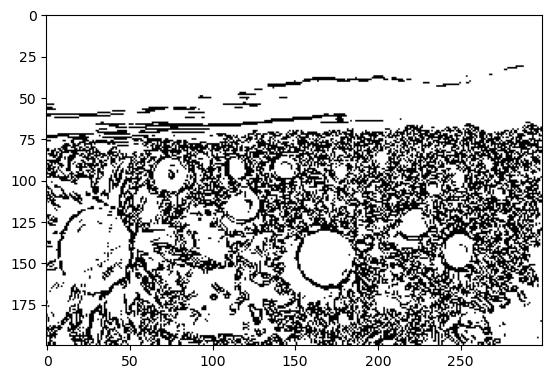

In [61]:
_, style_outline = cv.threshold(outline, 100, 255, cv.THRESH_BINARY_INV) #returns two values but use _, because it's not important, rechcek this part
plt.imshow(style_outline , cmap = "gray")

In [72]:
 mask_3ch = cv.cvtColor(style_outline , cv.COLOR_GRAY2BGR)
combined = cv.multiply(blur_img, mask_3ch, scale = 1/255)

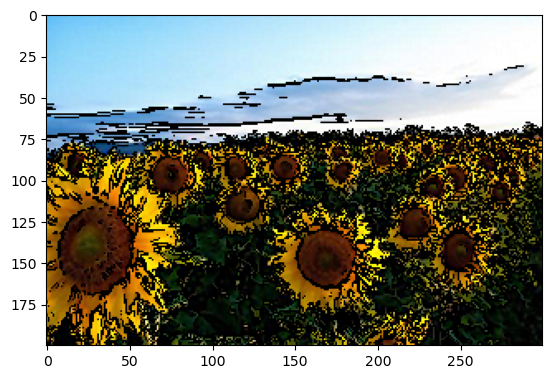

In [77]:
display_img = combined.copy()
plt.imshow(display_img)